In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Packet:
    def __init__(self, pkt_number,pkt_sent, ack_rcvd, time_ack_expected):
        self.pkt_number = pkt_number
        self.pkt_sent = pkt_sent
        self.ack_rcvd = ack_rcvd
        self.time_ack_expected = time_ack_expected

In [3]:
def send_packet(packet, current_time, pkt_time):
    packet.pkt_sent = current_time
    packet.time_ack_expected = current_time + pkt_time
    return packet

In [4]:
pkt_time = 20

In [5]:
def get_packet(pkt_number):
    packet = Packet(pkt_number, -1,False,-1)
    return packet

In [6]:
def update_window(packets, current_time,last_pkt_number, x):
    for packet in packets:
        if packet.time_ack_expected == current_time:
            if random.uniform(0,1) > x:
                packet.ack_rcvd = True
            else:
                send_packet(packet, current_time, pkt_time)
        if packet.pkt_sent == -1:
            send_packet(packet, current_time + packets.index(packet), pkt_time)
    first_rcvd = packets[0].ack_rcvd
    while(first_rcvd):
        packets.remove(packets[0])
        packets.append(get_packet(last_pkt_number))
        last_pkt_number += 1
        first_rcvd = packets[0].ack_rcvd
    return last_pkt_number

In [7]:
#errors = [1/10.0,1/1000.0]
errors = [1/100.0]
N = 100000
tputs = []
for e in errors:
    window_sizes = range(4,100)
    pkt_count = []
    for window_size in window_sizes:
        window_start = 0
        packets = []
        for i in range(0, window_size):
            packets.append(get_packet(i))
            send_packet(packets[i], i, pkt_time)
        #j = window_start + window_size
        #i = j
        i = 0
        last_pkt_number = window_size
        while i < N:
            last_pkt_number = update_window(packets,i, last_pkt_number, e)
            i += 1
        pkt_count += [last_pkt_number / (N - e * N)]
    tputs.append(pkt_count)

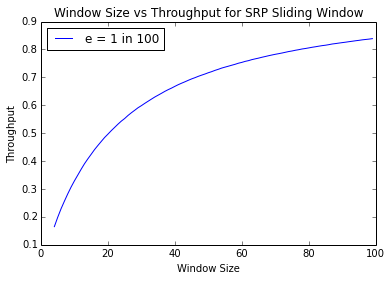

In [9]:
plt.plot(window_sizes, tputs[0])
#plt.plot(window_sizes, tputs[1])
plt.xlabel("Window Size")
plt.ylabel("Throughput")
plt.title("Window Size vs Throughput for SRP Sliding Window")
plt.legend(['e = 1 in 100', 'e = 1 in 1000'], loc='upper left')

plt.show()